In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sl

In [2]:
# read the data
df = pd.read_csv('./forFinalDefence/sim_2024-01-26_13-52-16_changing_tol.csv')

In [3]:
latency_y_max = 1.3
HitCountsmax = 70
UserReqmax = 1.0

rotangle = 30
figure_size = (20,5)
detail_fig_size = (12,6)
fontSize = 13

In [4]:
    access_patterns = [
        f"./request_maker/request_files/64Reqs/numReqs=64_recycleRatio=25.0_maxdistance=5.0.pkl",
        #"./request_maker/request_files/numReqs=64_recycleRatio=0.0_maxdistance=63.0_accessDensity=1.56_randomJampRatio_0.pkl",
        "./request_maker/request_files/numReqs=64_recycleRatio=0.0_maxdistance=62.0_accessDensity=3.12_randomJampRatio_5.pkl",
        #"./request_maker/request_files/numReqs=64_recycleRatio=0.0_maxdistance=50.0_accessDensity=21.88_randomJampRatio_10.pkl",
        #"./request_maker/request_files/numReqs=64_recycleRatio=1.56_maxdistance=29.0_accessDensity=54.69_randomJampRatio_25.pkl",
        #"./request_maker/request_files/numReqs=64_recycleRatio=0.0_maxdistance=24.0_accessDensity=62.5_randomJampRatio_50.pkl",
    ]

[[array([0.0504]), array([0.1197]), array([0.1001]), array([0.133])], [array([0.0527]), array([0.1155]), array([0.1006]), array([0.1323])], [array([0.0506]), array([0.1842]), array([0.1444]), array([0.149])], [array([0.0686]), array([0.1691]), array([0.1329]), array([0.1422])], [array([0.0465]), array([0.1207]), array([0.1077]), array([0.1306])], [array([0.0568]), array([0.1502]), array([0.1474]), array([0.1231])], [array([0.0925]), array([0.178]), array([0.18]), array([0.1217])], [array([0.0944]), array([0.18]), array([0.1772]), array([0.1278])], [array([0.0545]), array([0.1205]), array([0.1024]), array([0.1304])], [array([0.0677]), array([0.1139]), array([0.1034]), array([0.1329])], [array([0.0531]), array([0.1747]), array([0.1564]), array([0.1558])], [array([0.0551]), array([0.1749]), array([0.1358]), array([0.1444])], [array([0.0443]), array([0.1236]), array([0.1249]), array([0.1688])], [array([0.0824]), array([0.1381]), array([0.1714]), array([0.1328])], [array([0.0838]), array([0

/tmp/ipykernel_214795/3960352194.py:92: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(categories, rotation=rotangle, fontsize=fontSize)


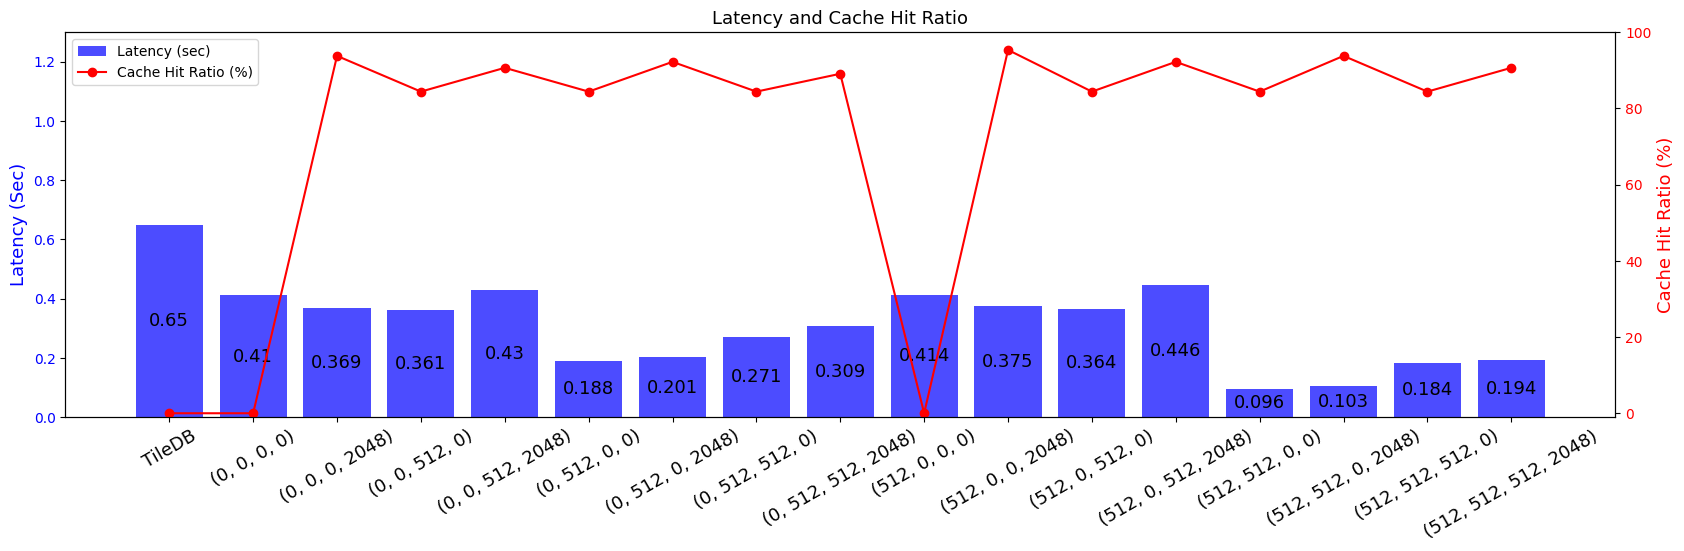

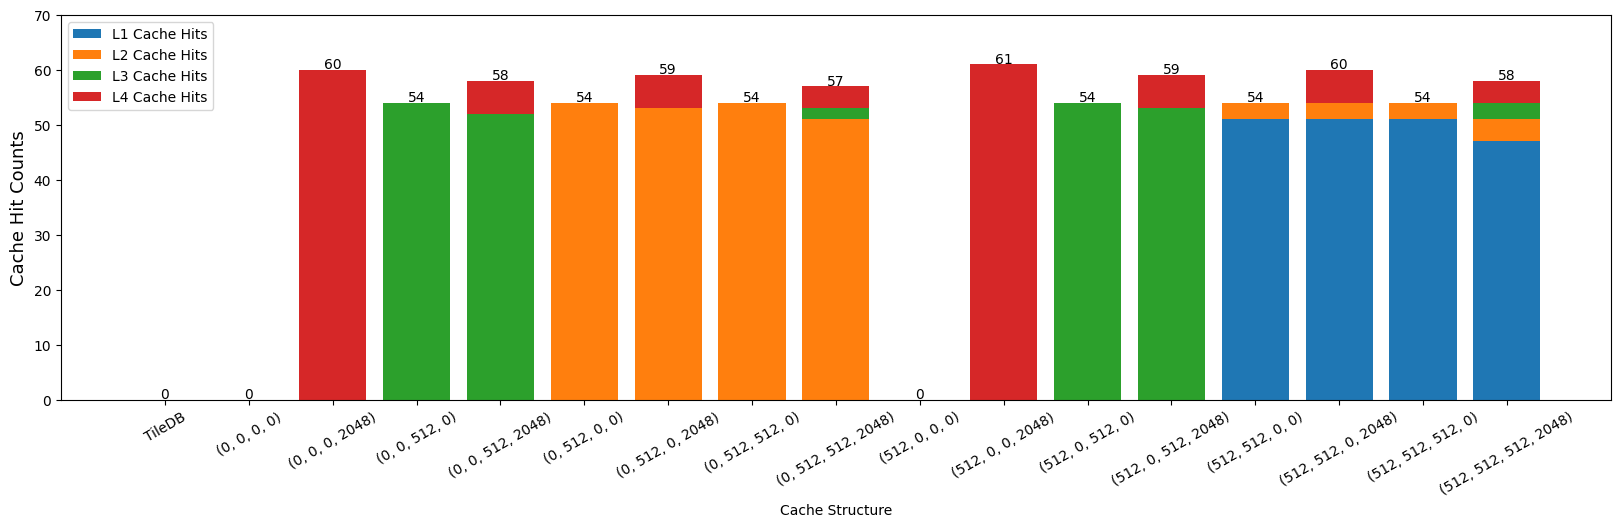

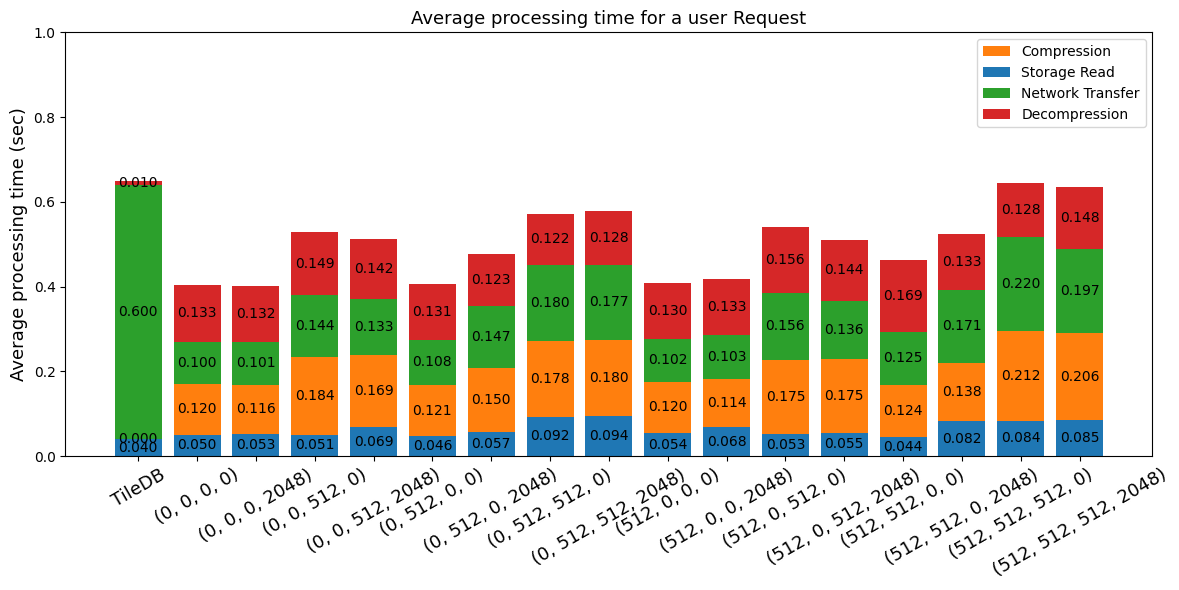

In [9]:
# 固定する変数
tol = 0.001
Tclatency = 0
UserAnal = 0.5 # ユーザの処理時間
nReqs = 64
accessPattern = "./request_maker/request_files/numReqs=64_recycleRatio=0.0_maxdistance=62.0_accessDensity=3.12_randomJampRatio_5.pkl"


df_arch = df[(df["tol"] == tol) & (df["anlTime"] == UserAnal) & (df["nReqs"] == nReqs) & (df["reqPatrn"] == accessPattern)]
df_arch = df_arch.drop(["nReqs","reqPatrn","blkSize"],axis=1)

# ここで、欲しいキャッシュ構成を持ってきてください
L1Sizes = [0,512]
L2Sizes = [0,512]
L3Sizes = [0,512]
L4Sizes = [0,2048]


hanrei = ["TileDB"]
latency = [[0.65]]
AllMissTime = [[64]]
HitUchiwake = []
UserReqLatUchiwake = []

# for TileDB
TileDBHitUchiwake = [[0,0,0,0]]
TileDBUserreq = [[0.04,0,0.60,0.01]]
                 
for L1size in L1Sizes:
    for L2size in L2Sizes:
        for L3size in L3Sizes:
            for L4size in L4Sizes:
                one_row = df_arch[(df_arch["L1Size"] == L1size) & (df_arch["L2Size"] == L2size) & (df_arch["L3Size"] == L3size) & (df_arch["L4Size"] == L4size)]
                hanrei.append(f"({L1size}, {L2size}, {L3size}, {L4size})")
                latency.append(one_row["AvrLat"].values)
                AllMissTime.append(one_row["nAllMis"].values) # nL1Hits,nL2Hits,nL3Hits,nL4Hits,nAllMis
                HitUchiwake.append([one_row["nL1Hits"].values,one_row["nL2Hits"].values,one_row["nL3Hits"].values,one_row["nL4Hits"].values])
                UserReqLatUchiwake.append([one_row["storageAvg"].values,one_row["compAvg"].values,one_row["networkAvg"].values,one_row["decompAvg"].values]) 

# 縦軸、平均レイテンシーの内訳の積み上げグラフ、横軸キャッシュ構成のグラフ ()
print(UserReqLatUchiwake)                
latency = [arr[0] for arr in latency]
AllMissTime = [arr[0] for arr in AllMissTime]
HitTimes = [nReqs - misstime for misstime in AllMissTime]
HitUchiwake = TileDBHitUchiwake + [[item[0] for item in sublist] for sublist in HitUchiwake]
UserReqLatUchiwake = TileDBUserreq + [[item[0] for item in sublist] for sublist in UserReqLatUchiwake]

print(HitUchiwake)
print(UserReqLatUchiwake)
print(UserReqLatUchiwake)
# rotation angle


##### latency and cache hit ratio to multiple archtectures #####
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = hanrei
values = latency
cacheHitRatio = [HitTime/nReqs*100 for HitTime in HitTimes]

# Set the width and height of the figure
fig, ax1 = plt.subplots(figsize=figure_size)  # Adjust the values in figsize=(width, height)

# Create the first bar chart for latency
bars = ax1.bar(categories, latency, color='b', alpha=0.7, label='Latency (sec)')

# Label the first y-axis
# ax1.set_xlabel("Cache Structure")
ax1.set_ylabel("Latency (Seconds)", color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis (twin) for cache hit ratio
ax2 = ax1.twinx()
ax2.plot(categories, cacheHitRatio, color='r', marker='o', label='Cache Hit Ratio (%)')

# Label the second y-axis
ax2.set_ylabel("Cache Hit Ratio (%)", color='r', fontsize=fontSize)
ax2.tick_params(axis='y', labelcolor='r')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper left")

# Add a title
# plt.title(f"Latency and Cache Hit Ratio for Tolerance={tol}, User analysis time={UserAnal}", fontsize=13)
plt.title(f"Latency and Cache Hit Ratio", fontsize=fontSize)

# Set x-axis tick labels rotation and font size
ax1.set_xticklabels(categories, rotation=rotangle, fontsize=fontSize)

# Increase font size for x-axis labels
# ax1.set_xlabel("Cache Structure", fontsize=fontSize)
ax1.set_ylabel("Latency (Sec)", color='b', fontsize=fontSize)

# Annotate the bars with their values within the bars
for bar, value in zip(bars, latency):
    ax1.text(bar.get_x() + bar.get_width() / 2, value / 2,
             str(round(value, 3)), ha='center', va='center', fontsize=fontSize)

ax1.set_ylim(0,latency_y_max)
ax2.set_ylim(-1,100)


# Save the figure
file_name = f"scanining_5_tol={tol}_analTIme={UserAnal}_latency_{Tclatency}ms.png"
fig.savefig(file_name, bbox_inches='tight',format="png",dpi=300)



#############　キャッシュヒットの内訳 ################
# キャッシュヒットの内訳テスト
import matplotlib.pyplot as plt
import numpy as np

# Sample data
hanrei = hanrei
uchiwake = HitUchiwake

# Extract L1, L2, L3, L4 cache hit values separately
l1_hits = [item[0] for item in uchiwake]
l2_hits = [item[1] for item in uchiwake]
l3_hits = [item[2] for item in uchiwake]
l4_hits = [item[3] for item in uchiwake]

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=figure_size)

# Calculate the bottom positions for each category to stack the bars
bottom_l1 = np.zeros(len(hanrei))
bottom_l2 = np.add(bottom_l1, l1_hits)
bottom_l3 = np.add(bottom_l2, l2_hits)
bottom_l4 = np.add(bottom_l3, l3_hits)

# Define custom colors for each category
colors = ['tab:blue', 'tab:orange', 'tab:green','tab:red' ]


for i in range(len(hanrei)):
    ax.bar(hanrei[i], l1_hits[i], bottom=bottom_l1[i])
    ax.bar(hanrei[i], l2_hits[i], bottom=bottom_l2[i])
    ax.bar(hanrei[i], l3_hits[i], bottom=bottom_l3[i])
    ax.bar(hanrei[i], l4_hits[i], bottom=bottom_l4[i])
    
    total = l1_hits[i] + l2_hits[i] + l3_hits[i] + l4_hits[i]
    
    # Add count label on top of each bar
    ax.annotate(f"{total}", (hanrei[i], total + 1), ha='center', va='center', fontsize=10)

# Plot the stacked bars
ax.bar(hanrei, l1_hits, label='L1 Cache Hits', bottom=bottom_l1,color = colors[0])
ax.bar(hanrei, l2_hits, label='L2 Cache Hits', bottom=bottom_l2,color = colors[1])
ax.bar(hanrei, l3_hits, label='L3 Cache Hits', bottom=bottom_l3,color = colors[2])
ax.bar(hanrei, l4_hits, label='L4 Cache Hits', bottom=bottom_l4,color = colors[3])

# Label the axes and add a title
plt.xlabel("Cache Structure")
plt.ylabel("Cache Hit Counts",fontsize=fontSize)

# Rotate x-axis labels for better readability
plt.xticks(rotation=rotangle,fontsize=10)

# Add a legend
ax.legend()
ax.set_ylim(0,HitCountsmax)


file_name = f"scanning_5_tol={tol}_analTIme={UserAnal}_cachehitDetail_latency={Tclatency}ms.png"

# Show the chart
fig.savefig(file_name, bbox_inches='tight',format="png",dpi=300)


################ ユーザのリクエストに対する各プロセスの平均処理時間の内訳 ################



# Sample data
categories = hanrei
data = UserReqLatUchiwake

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=detail_fig_size)

# Extract StorageRead, Compression, NetworkLatency, and Decompression values separately
storage_read = [item[0] for item in data]
compression = [item[1] for item in data]
network_latency = [item[2] for item in data]
decompression = [item[3] for item in data]

# Calculate the bottom positions for each category to stack the bars
bottom_storage_read = np.zeros(len(categories))
bottom_compression = np.add(bottom_storage_read, storage_read)
bottom_network_latency = np.add(bottom_compression, compression)
bottom_decompression = np.add(bottom_network_latency, network_latency)

# Plot the stacked bars and add annotations for each segment
for i in range(len(categories)):
    ax.bar(categories[i], storage_read[i], bottom=bottom_storage_read[i], label='Storage Read', color='tab:blue')
    ax.annotate(f'{storage_read[i]:.3f}', (categories[i], bottom_storage_read[i] + storage_read[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

    ax.bar(categories[i], compression[i], bottom=bottom_compression[i], label='Compression', color='tab:orange')
    ax.annotate(f'{compression[i]:.3f}', (categories[i], bottom_compression[i] + compression[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

    ax.bar(categories[i], network_latency[i], bottom=bottom_network_latency[i], label='Network Transfer', color='tab:green')
    ax.annotate(f'{network_latency[i]:.3f}', (categories[i], bottom_network_latency[i] + network_latency[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

    ax.bar(categories[i], decompression[i], bottom=bottom_decompression[i], label='Decompression', color='tab:red')
    ax.annotate(f'{decompression[i]:.3f}', (categories[i], bottom_decompression[i] + decompression[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

# Label the axes and add a titl3
# plt.xlabel("Cache Structure",fontsize=13)
plt.ylabel("Average processing time (sec)",fontsize=13)
plt.title(f"Average processing time for a user Request",fontsize=13)

# Rotate x-axis labels for better readability
plt.xticks(rotation=rotangle,fontsize=13)

# Add a legend with only four labels
handles, labels = ax.get_legend_handles_labels()
unique_labels = list(set(labels))[:4]  # Keep only the first four unique labels
ax.legend([handles[labels.index(label)] for label in unique_labels], unique_labels, loc="upper right")
ax.set_ylim(0,UserReqmax)

file_name = f"scanning_5_tol={tol}_analTIme={UserAnal}_eachProc_latency_{Tclatency}ms.png"

fig.tight_layout()
# Show the chart
fig.savefig(file_name,bbox_inches='tight',format="png",dpi=300)





[[array([0.0492]), array([0.1228]), array([0.3361]), array([0.1336])], [array([0.0677]), array([0.1173]), array([0.3359]), array([0.1335])], [array([0.1048]), array([0.1322]), array([0.3457]), array([0.1341])], [array([0.0579]), array([0.1643]), array([0.3476]), array([0.134])], [array([0.0511]), array([0.1381]), array([0.4966]), array([0.1317])], [array([0.0484]), array([0.1257]), array([0.499]), array([0.1314])], [array([0.05]), array([0.1937]), array([0.5059]), array([0.1369])], [array([0.076]), array([0.207]), array([0.5031]), array([0.1398])], [array([0.0468]), array([0.1216]), array([0.3364]), array([0.1328])], [array([0.0637]), array([0.1162]), array([0.3339]), array([0.134])], [array([0.1062]), array([0.161]), array([0.3402]), array([0.1343])], [array([0.0782]), array([0.1692]), array([0.3421]), array([0.134])], [array([0.0531]), array([0.1213]), array([0.5614]), array([0.1308])], [array([0.0537]), array([0.1268]), array([0.5869]), array([0.1299])], [array([0.0683]), array([0.1

/tmp/ipykernel_214795/2143870713.py:92: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(categories, rotation=rotangle, fontsize=fontSize)


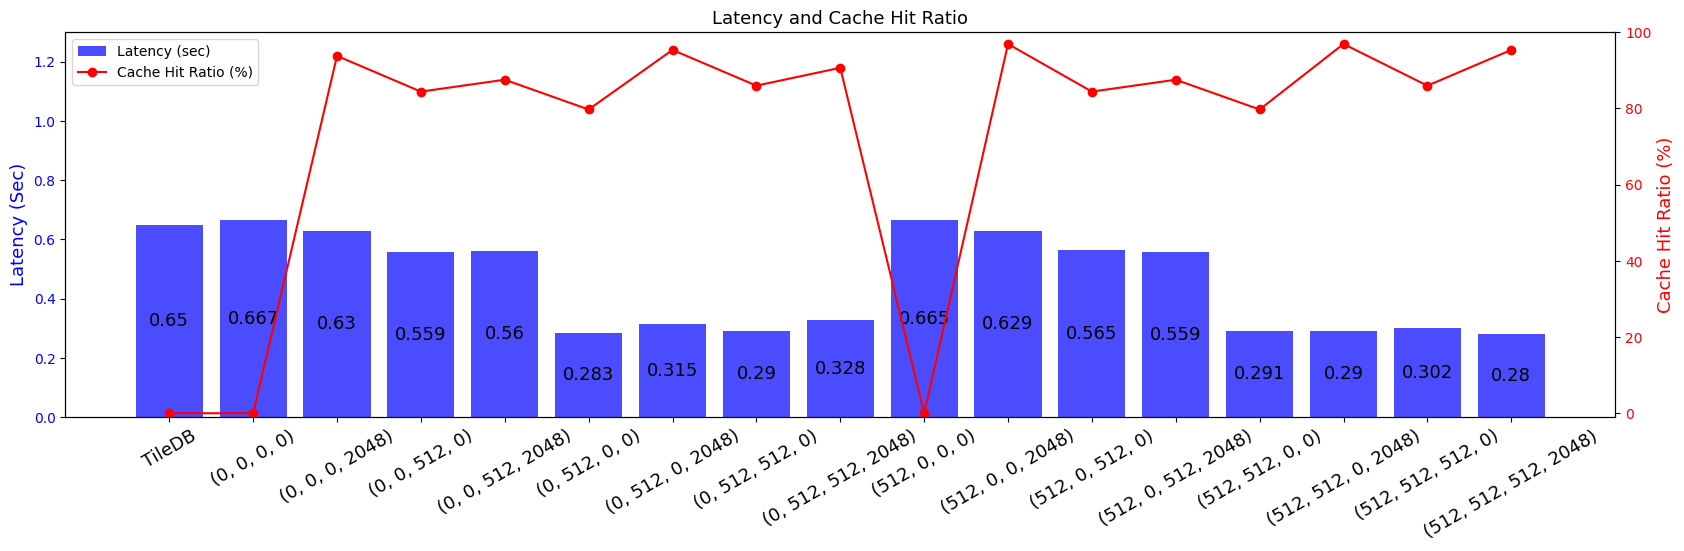

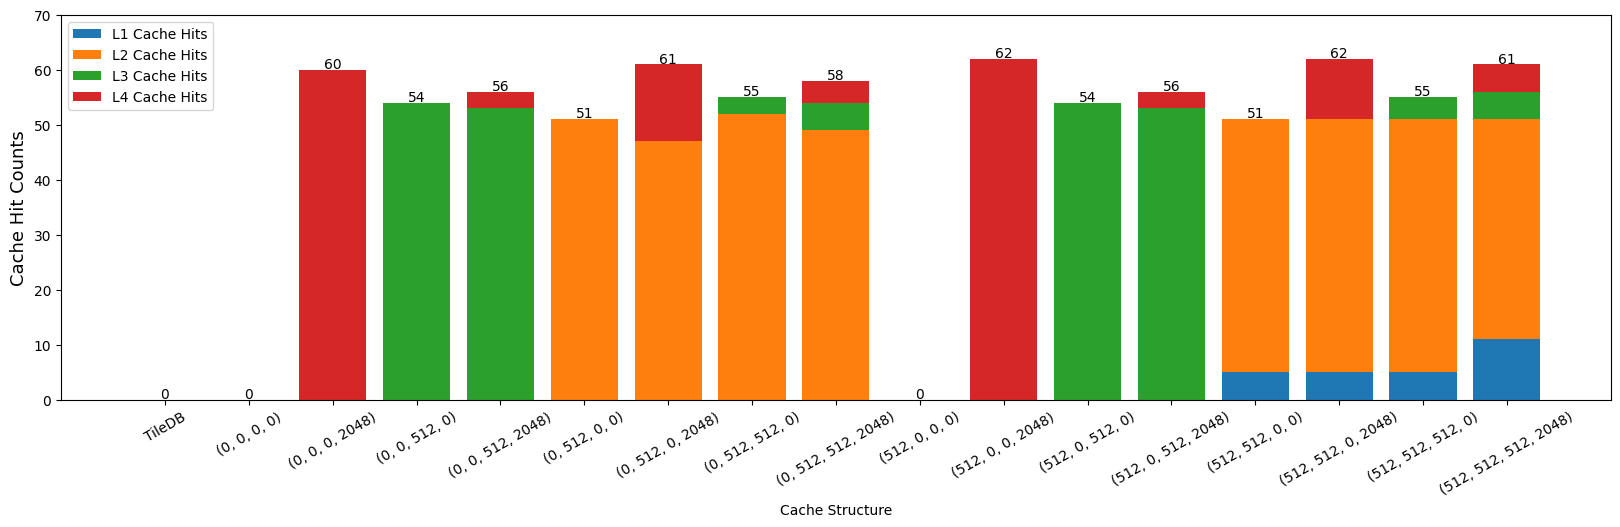

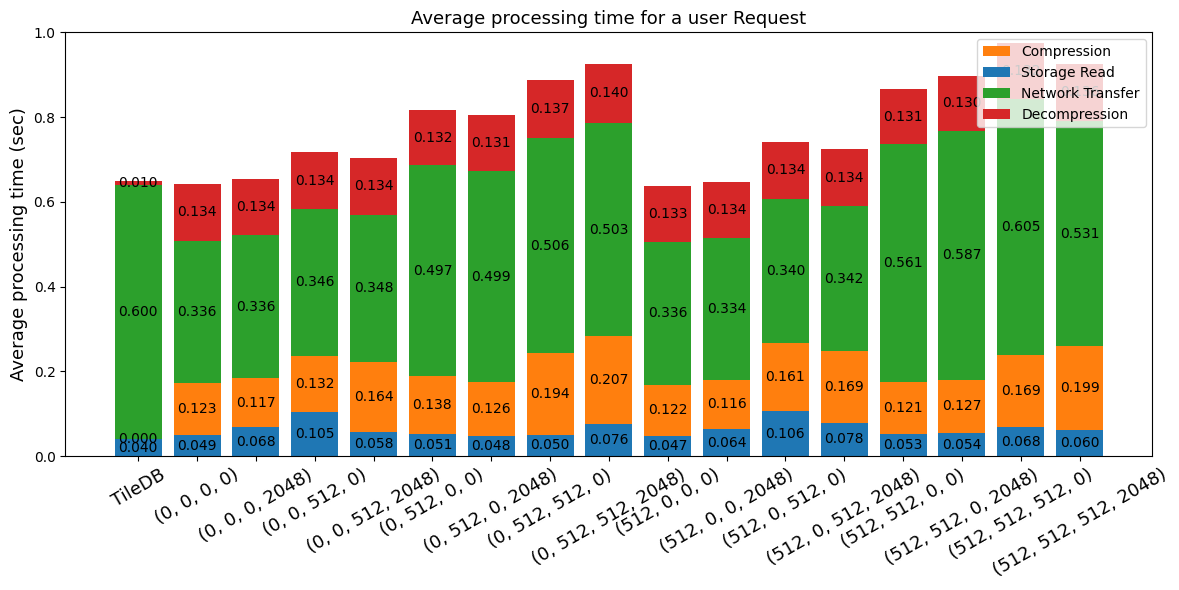

In [10]:
# 固定する変数
tol = 0.00001
Tclatency = 0
UserAnal = 0.5 # ユーザの処理時間
nReqs = 64
accessPattern = "./request_maker/request_files/numReqs=64_recycleRatio=0.0_maxdistance=62.0_accessDensity=3.12_randomJampRatio_5.pkl"


df_arch = df[(df["tol"] == tol) & (df["anlTime"] == UserAnal) & (df["nReqs"] == nReqs) & (df["reqPatrn"] == accessPattern)]
df_arch = df_arch.drop(["nReqs","reqPatrn","blkSize"],axis=1)

# ここで、欲しいキャッシュ構成を持ってきてください
L1Sizes = [0,512]
L2Sizes = [0,512]
L3Sizes = [0,512]
L4Sizes = [0,2048]


hanrei = ["TileDB"]
latency = [[0.65]]
AllMissTime = [[64]]
HitUchiwake = []
UserReqLatUchiwake = []

# for TileDB
TileDBHitUchiwake = [[0,0,0,0]]
TileDBUserreq = [[0.04,0,0.60,0.01]]
                 
for L1size in L1Sizes:
    for L2size in L2Sizes:
        for L3size in L3Sizes:
            for L4size in L4Sizes:
                one_row = df_arch[(df_arch["L1Size"] == L1size) & (df_arch["L2Size"] == L2size) & (df_arch["L3Size"] == L3size) & (df_arch["L4Size"] == L4size)]
                hanrei.append(f"({L1size}, {L2size}, {L3size}, {L4size})")
                latency.append(one_row["AvrLat"].values)
                AllMissTime.append(one_row["nAllMis"].values) # nL1Hits,nL2Hits,nL3Hits,nL4Hits,nAllMis
                HitUchiwake.append([one_row["nL1Hits"].values,one_row["nL2Hits"].values,one_row["nL3Hits"].values,one_row["nL4Hits"].values])
                UserReqLatUchiwake.append([one_row["storageAvg"].values,one_row["compAvg"].values,one_row["networkAvg"].values,one_row["decompAvg"].values]) 

# 縦軸、平均レイテンシーの内訳の積み上げグラフ、横軸キャッシュ構成のグラフ ()
print(UserReqLatUchiwake)                
latency = [arr[0] for arr in latency]
AllMissTime = [arr[0] for arr in AllMissTime]
HitTimes = [nReqs - misstime for misstime in AllMissTime]
HitUchiwake = TileDBHitUchiwake + [[item[0] for item in sublist] for sublist in HitUchiwake]
UserReqLatUchiwake = TileDBUserreq + [[item[0] for item in sublist] for sublist in UserReqLatUchiwake]

print(HitUchiwake)
print(UserReqLatUchiwake)
print(UserReqLatUchiwake)
# rotation angle


##### latency and cache hit ratio to multiple archtectures #####
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = hanrei
values = latency
cacheHitRatio = [HitTime/nReqs*100 for HitTime in HitTimes]

# Set the width and height of the figure
fig, ax1 = plt.subplots(figsize=figure_size)  # Adjust the values in figsize=(width, height)

# Create the first bar chart for latency
bars = ax1.bar(categories, latency, color='b', alpha=0.7, label='Latency (sec)')

# Label the first y-axis
# ax1.set_xlabel("Cache Structure")
ax1.set_ylabel("Latency (Seconds)", color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis (twin) for cache hit ratio
ax2 = ax1.twinx()
ax2.plot(categories, cacheHitRatio, color='r', marker='o', label='Cache Hit Ratio (%)')

# Label the second y-axis
ax2.set_ylabel("Cache Hit Ratio (%)", color='r', fontsize=fontSize)
ax2.tick_params(axis='y', labelcolor='r')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper left")

# Add a title
# plt.title(f"Latency and Cache Hit Ratio for Tolerance={tol}, User analysis time={UserAnal}", fontsize=13)
plt.title(f"Latency and Cache Hit Ratio", fontsize=fontSize)

# Set x-axis tick labels rotation and font size
ax1.set_xticklabels(categories, rotation=rotangle, fontsize=fontSize)

# Increase font size for x-axis labels
# ax1.set_xlabel("Cache Structure", fontsize=fontSize)
ax1.set_ylabel("Latency (Sec)", color='b', fontsize=fontSize)

# Annotate the bars with their values within the bars
for bar, value in zip(bars, latency):
    ax1.text(bar.get_x() + bar.get_width() / 2, value / 2,
             str(round(value, 3)), ha='center', va='center', fontsize=fontSize)

ax1.set_ylim(0,latency_y_max)
ax2.set_ylim(-1,100)


# Save the figure
file_name = f"scanning_5_tol={tol}_analTIme={UserAnal}_latency_{Tclatency}ms.png"
fig.savefig(file_name, bbox_inches='tight',format="png",dpi=300)



#############　キャッシュヒットの内訳 ################
# キャッシュヒットの内訳テスト
import matplotlib.pyplot as plt
import numpy as np

# Sample data
hanrei = hanrei
uchiwake = HitUchiwake

# Extract L1, L2, L3, L4 cache hit values separately
l1_hits = [item[0] for item in uchiwake]
l2_hits = [item[1] for item in uchiwake]
l3_hits = [item[2] for item in uchiwake]
l4_hits = [item[3] for item in uchiwake]

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=figure_size)

# Calculate the bottom positions for each category to stack the bars
bottom_l1 = np.zeros(len(hanrei))
bottom_l2 = np.add(bottom_l1, l1_hits)
bottom_l3 = np.add(bottom_l2, l2_hits)
bottom_l4 = np.add(bottom_l3, l3_hits)

# Define custom colors for each category
colors = ['tab:blue', 'tab:orange', 'tab:green','tab:red' ]


for i in range(len(hanrei)):
    ax.bar(hanrei[i], l1_hits[i], bottom=bottom_l1[i])
    ax.bar(hanrei[i], l2_hits[i], bottom=bottom_l2[i])
    ax.bar(hanrei[i], l3_hits[i], bottom=bottom_l3[i])
    ax.bar(hanrei[i], l4_hits[i], bottom=bottom_l4[i])
    
    total = l1_hits[i] + l2_hits[i] + l3_hits[i] + l4_hits[i]
    
    # Add count label on top of each bar
    ax.annotate(f"{total}", (hanrei[i], total + 1), ha='center', va='center', fontsize=10)

# Plot the stacked bars
ax.bar(hanrei, l1_hits, label='L1 Cache Hits', bottom=bottom_l1,color = colors[0])
ax.bar(hanrei, l2_hits, label='L2 Cache Hits', bottom=bottom_l2,color = colors[1])
ax.bar(hanrei, l3_hits, label='L3 Cache Hits', bottom=bottom_l3,color = colors[2])
ax.bar(hanrei, l4_hits, label='L4 Cache Hits', bottom=bottom_l4,color = colors[3])

# Label the axes and add a title
plt.xlabel("Cache Structure")
plt.ylabel("Cache Hit Counts",fontsize=fontSize)

# Rotate x-axis labels for better readability
plt.xticks(rotation=rotangle,fontsize=10)

# Add a legend
ax.legend()
ax.set_ylim(0,HitCountsmax)


file_name = f"scanning_5_tol={tol}_analTIme={UserAnal}_cachehitDetail_latency={Tclatency}ms.png"

# Show the chart
fig.savefig(file_name, bbox_inches='tight',format="png",dpi=300)


################ ユーザのリクエストに対する各プロセスの平均処理時間の内訳 ################



# Sample data
categories = hanrei
data = UserReqLatUchiwake

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=detail_fig_size)

# Extract StorageRead, Compression, NetworkLatency, and Decompression values separately
storage_read = [item[0] for item in data]
compression = [item[1] for item in data]
network_latency = [item[2] for item in data]
decompression = [item[3] for item in data]

# Calculate the bottom positions for each category to stack the bars
bottom_storage_read = np.zeros(len(categories))
bottom_compression = np.add(bottom_storage_read, storage_read)
bottom_network_latency = np.add(bottom_compression, compression)
bottom_decompression = np.add(bottom_network_latency, network_latency)

# Plot the stacked bars and add annotations for each segment
for i in range(len(categories)):
    ax.bar(categories[i], storage_read[i], bottom=bottom_storage_read[i], label='Storage Read', color='tab:blue')
    ax.annotate(f'{storage_read[i]:.3f}', (categories[i], bottom_storage_read[i] + storage_read[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

    ax.bar(categories[i], compression[i], bottom=bottom_compression[i], label='Compression', color='tab:orange')
    ax.annotate(f'{compression[i]:.3f}', (categories[i], bottom_compression[i] + compression[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

    ax.bar(categories[i], network_latency[i], bottom=bottom_network_latency[i], label='Network Transfer', color='tab:green')
    ax.annotate(f'{network_latency[i]:.3f}', (categories[i], bottom_network_latency[i] + network_latency[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

    ax.bar(categories[i], decompression[i], bottom=bottom_decompression[i], label='Decompression', color='tab:red')
    ax.annotate(f'{decompression[i]:.3f}', (categories[i], bottom_decompression[i] + decompression[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

# Label the axes and add a titl3
# plt.xlabel("Cache Structure",fontsize=13)
plt.ylabel("Average processing time (sec)",fontsize=13)
plt.title(f"Average processing time for a user Request",fontsize=13)

# Rotate x-axis labels for better readability
plt.xticks(rotation=rotangle,fontsize=13)

# Add a legend with only four labels
handles, labels = ax.get_legend_handles_labels()
unique_labels = list(set(labels))[:4]  # Keep only the first four unique labels
ax.legend([handles[labels.index(label)] for label in unique_labels], unique_labels, loc="upper right")
ax.set_ylim(0,UserReqmax)

file_name = f"scanning_5_tol={tol}_analTIme={UserAnal}_eachProc_latency_{Tclatency}ms.png"

fig.tight_layout()
# Show the chart
fig.savefig(file_name,bbox_inches='tight',format="png",dpi=300)





# wanderingの方

[[array([0.0495]), array([0.1201]), array([0.0862]), array([0.1315])], [array([0.0652]), array([0.1164]), array([0.0869]), array([0.132])], [array([0.0957]), array([0.1549]), array([0.1104]), array([0.1415])], [array([0.0764]), array([0.1732]), array([0.1144]), array([0.1461])], [array([0.0489]), array([0.1258]), array([0.107]), array([0.1241])], [array([0.051]), array([0.1194]), array([0.116]), array([0.1256])], [array([0.0781]), array([0.1853]), array([0.1512]), array([0.1291])], [array([0.099]), array([0.1549]), array([0.1403]), array([0.1308])], [array([0.0442]), array([0.1217]), array([0.0906]), array([0.1323])], [array([0.0521]), array([0.1238]), array([0.092]), array([0.1351])], [array([0.0734]), array([0.1773]), array([0.1258]), array([0.1489])], [array([0.1459]), array([0.1814]), array([0.12]), array([0.1466])], [array([0.056]), array([0.1233]), array([0.1335]), array([0.1404])], [array([0.0669]), array([0.1253]), array([0.1387]), array([0.1432])], [array([0.0894]), array([0.1

/tmp/ipykernel_214795/1379149248.py:92: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(categories, rotation=rotangle, fontsize=fontSize)


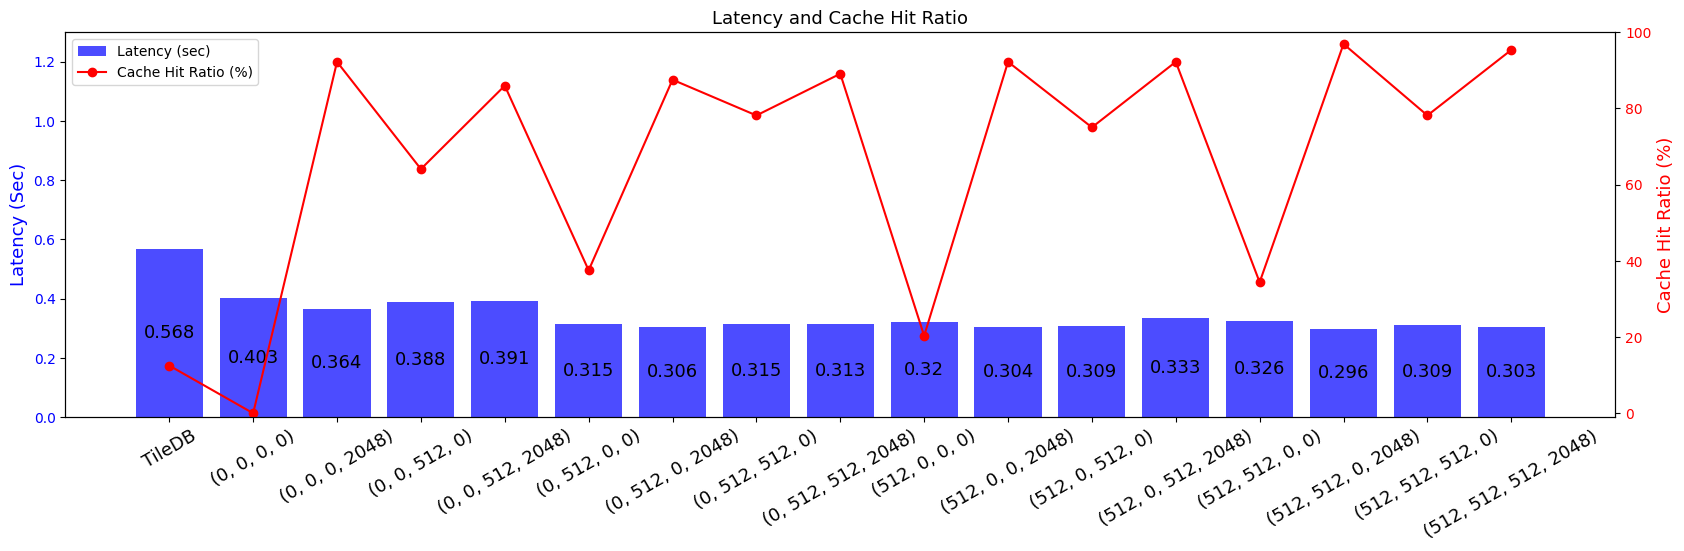

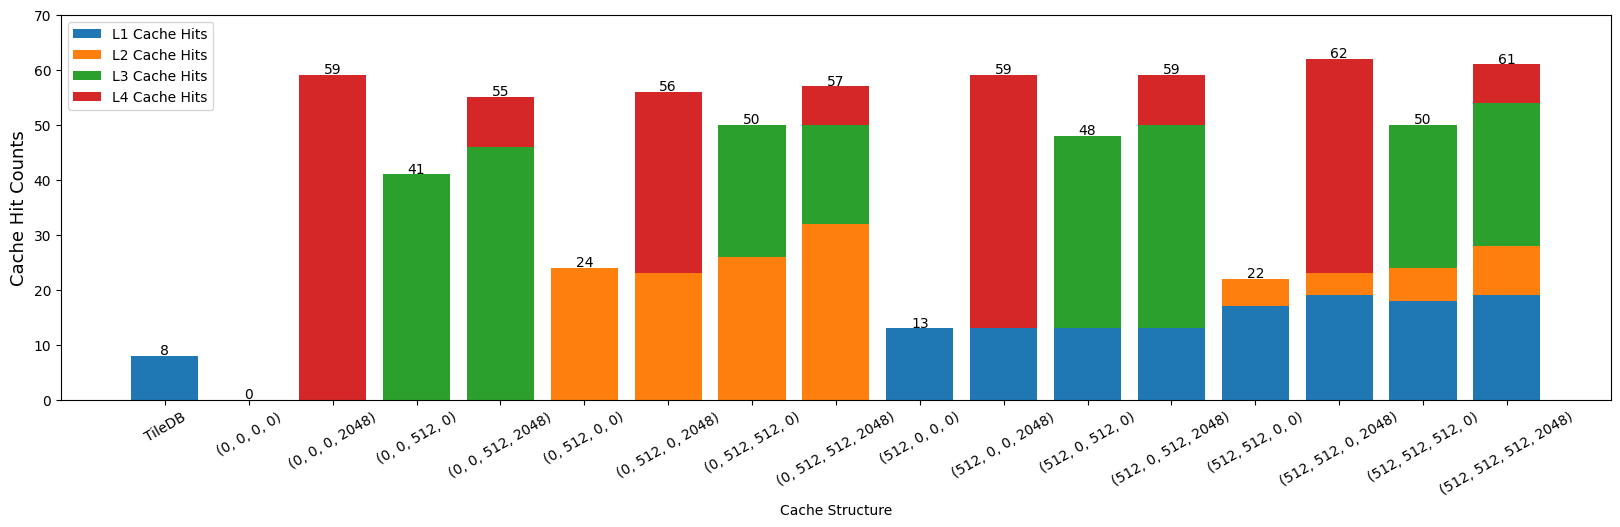

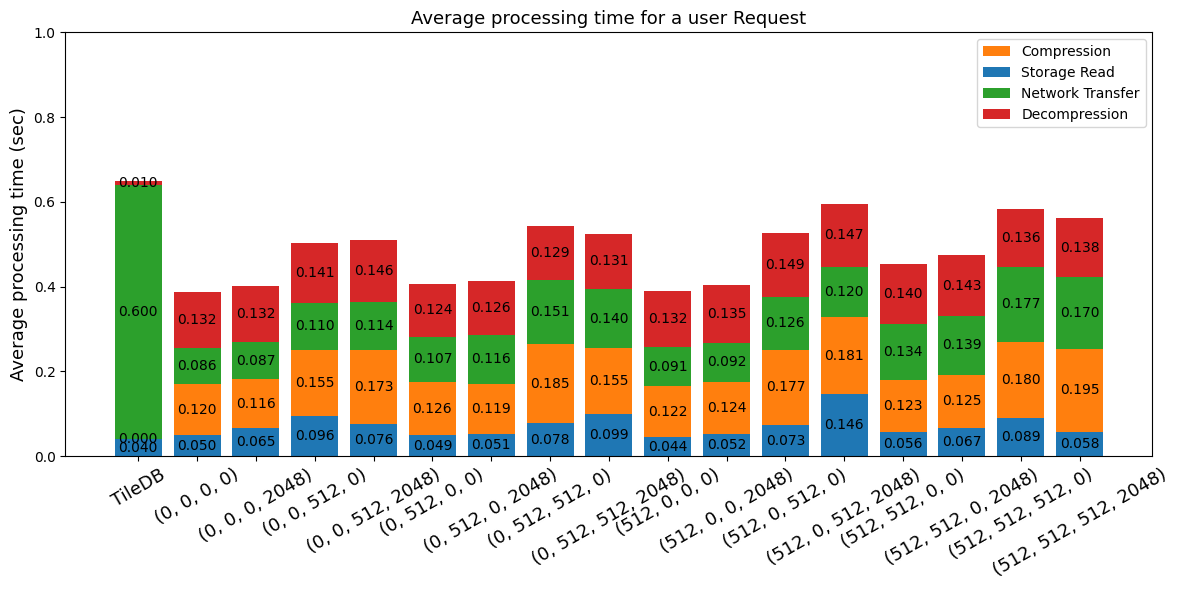

In [11]:
# 固定する変数
tol = 0.001
Tclatency = 0
UserAnal = 0.5 # ユーザの処理時間
nReqs = 64
accessPattern = f"./request_maker/request_files/64Reqs/numReqs=64_recycleRatio=25.0_maxdistance=5.0.pkl"


df_arch = df[(df["tol"] == tol) & (df["anlTime"] == UserAnal) & (df["nReqs"] == nReqs) & (df["reqPatrn"] == accessPattern)]
df_arch = df_arch.drop(["nReqs","reqPatrn","blkSize"],axis=1)

# ここで、欲しいキャッシュ構成を持ってきてください
L1Sizes = [0,512]
L2Sizes = [0,512]
L3Sizes = [0,512]
L4Sizes = [0,2048]


hanrei = ["TileDB"]
latency = [[0.568]]
AllMissTime = [[56]]
HitUchiwake = []
UserReqLatUchiwake = []

# for TileDB
TileDBHitUchiwake = [[8,0,0,0]]
TileDBUserreq = [[0.04,0,0.60,0.01]]
                 
for L1size in L1Sizes:
    for L2size in L2Sizes:
        for L3size in L3Sizes:
            for L4size in L4Sizes:
                one_row = df_arch[(df_arch["L1Size"] == L1size) & (df_arch["L2Size"] == L2size) & (df_arch["L3Size"] == L3size) & (df_arch["L4Size"] == L4size)]
                hanrei.append(f"({L1size}, {L2size}, {L3size}, {L4size})")
                latency.append(one_row["AvrLat"].values)
                AllMissTime.append(one_row["nAllMis"].values) # nL1Hits,nL2Hits,nL3Hits,nL4Hits,nAllMis
                HitUchiwake.append([one_row["nL1Hits"].values,one_row["nL2Hits"].values,one_row["nL3Hits"].values,one_row["nL4Hits"].values])
                UserReqLatUchiwake.append([one_row["storageAvg"].values,one_row["compAvg"].values,one_row["networkAvg"].values,one_row["decompAvg"].values]) 

# 縦軸、平均レイテンシーの内訳の積み上げグラフ、横軸キャッシュ構成のグラフ ()
print(UserReqLatUchiwake)                
latency = [arr[0] for arr in latency]
AllMissTime = [arr[0] for arr in AllMissTime]
HitTimes = [nReqs - misstime for misstime in AllMissTime]
HitUchiwake = TileDBHitUchiwake + [[item[0] for item in sublist] for sublist in HitUchiwake]
UserReqLatUchiwake = TileDBUserreq + [[item[0] for item in sublist] for sublist in UserReqLatUchiwake]

print(HitUchiwake)
print(UserReqLatUchiwake)
print(UserReqLatUchiwake)
# rotation angle


##### latency and cache hit ratio to multiple archtectures #####
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = hanrei
values = latency
cacheHitRatio = [HitTime/nReqs*100 for HitTime in HitTimes]

# Set the width and height of the figure
fig, ax1 = plt.subplots(figsize=figure_size)  # Adjust the values in figsize=(width, height)

# Create the first bar chart for latency
bars = ax1.bar(categories, latency, color='b', alpha=0.7, label='Latency (sec)')

# Label the first y-axis
# ax1.set_xlabel("Cache Structure")
ax1.set_ylabel("Latency (Seconds)", color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis (twin) for cache hit ratio
ax2 = ax1.twinx()
ax2.plot(categories, cacheHitRatio, color='r', marker='o', label='Cache Hit Ratio (%)')

# Label the second y-axis
ax2.set_ylabel("Cache Hit Ratio (%)", color='r', fontsize=fontSize)
ax2.tick_params(axis='y', labelcolor='r')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper left")

# Add a title
# plt.title(f"Latency and Cache Hit Ratio for Tolerance={tol}, User analysis time={UserAnal}", fontsize=13)
plt.title(f"Latency and Cache Hit Ratio", fontsize=fontSize)

# Set x-axis tick labels rotation and font size
ax1.set_xticklabels(categories, rotation=rotangle, fontsize=fontSize)

# Increase font size for x-axis labels
# ax1.set_xlabel("Cache Structure", fontsize=fontSize)
ax1.set_ylabel("Latency (Sec)", color='b', fontsize=fontSize)

# Annotate the bars with their values within the bars
for bar, value in zip(bars, latency):
    ax1.text(bar.get_x() + bar.get_width() / 2, value / 2,
             str(round(value, 3)), ha='center', va='center', fontsize=fontSize)

ax1.set_ylim(0,latency_y_max)
ax2.set_ylim(-1,100)


# Save the figure
file_name = f"scanning_5_tol={tol}_analTIme={UserAnal}_latency_{Tclatency}ms.png"
fig.savefig(file_name, bbox_inches='tight',format="png",dpi=300)



#############　キャッシュヒットの内訳 ################
# キャッシュヒットの内訳テスト
import matplotlib.pyplot as plt
import numpy as np

# Sample data
hanrei = hanrei
uchiwake = HitUchiwake

# Extract L1, L2, L3, L4 cache hit values separately
l1_hits = [item[0] for item in uchiwake]
l2_hits = [item[1] for item in uchiwake]
l3_hits = [item[2] for item in uchiwake]
l4_hits = [item[3] for item in uchiwake]

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=figure_size)

# Calculate the bottom positions for each category to stack the bars
bottom_l1 = np.zeros(len(hanrei))
bottom_l2 = np.add(bottom_l1, l1_hits)
bottom_l3 = np.add(bottom_l2, l2_hits)
bottom_l4 = np.add(bottom_l3, l3_hits)

# Define custom colors for each category
colors = ['tab:blue', 'tab:orange', 'tab:green','tab:red' ]


for i in range(len(hanrei)):
    ax.bar(hanrei[i], l1_hits[i], bottom=bottom_l1[i])
    ax.bar(hanrei[i], l2_hits[i], bottom=bottom_l2[i])
    ax.bar(hanrei[i], l3_hits[i], bottom=bottom_l3[i])
    ax.bar(hanrei[i], l4_hits[i], bottom=bottom_l4[i])
    
    total = l1_hits[i] + l2_hits[i] + l3_hits[i] + l4_hits[i]
    
    # Add count label on top of each bar
    ax.annotate(f"{total}", (hanrei[i], total + 1), ha='center', va='center', fontsize=10)

# Plot the stacked bars
ax.bar(hanrei, l1_hits, label='L1 Cache Hits', bottom=bottom_l1,color = colors[0])
ax.bar(hanrei, l2_hits, label='L2 Cache Hits', bottom=bottom_l2,color = colors[1])
ax.bar(hanrei, l3_hits, label='L3 Cache Hits', bottom=bottom_l3,color = colors[2])
ax.bar(hanrei, l4_hits, label='L4 Cache Hits', bottom=bottom_l4,color = colors[3])

# Label the axes and add a title
plt.xlabel("Cache Structure")
plt.ylabel("Cache Hit Counts",fontsize=fontSize)

# Rotate x-axis labels for better readability
plt.xticks(rotation=rotangle,fontsize=10)

# Add a legend
ax.legend()
ax.set_ylim(0,HitCountsmax)


file_name = f"scanning_5_tol={tol}_analTIme={UserAnal}_cachehitDetail_latency={Tclatency}ms.png"

# Show the chart
fig.savefig(file_name, bbox_inches='tight',format="png",dpi=300)


################ ユーザのリクエストに対する各プロセスの平均処理時間の内訳 ################



# Sample data
categories = hanrei
data = UserReqLatUchiwake

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=detail_fig_size)

# Extract StorageRead, Compression, NetworkLatency, and Decompression values separately
storage_read = [item[0] for item in data]
compression = [item[1] for item in data]
network_latency = [item[2] for item in data]
decompression = [item[3] for item in data]

# Calculate the bottom positions for each category to stack the bars
bottom_storage_read = np.zeros(len(categories))
bottom_compression = np.add(bottom_storage_read, storage_read)
bottom_network_latency = np.add(bottom_compression, compression)
bottom_decompression = np.add(bottom_network_latency, network_latency)

# Plot the stacked bars and add annotations for each segment
for i in range(len(categories)):
    ax.bar(categories[i], storage_read[i], bottom=bottom_storage_read[i], label='Storage Read', color='tab:blue')
    ax.annotate(f'{storage_read[i]:.3f}', (categories[i], bottom_storage_read[i] + storage_read[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

    ax.bar(categories[i], compression[i], bottom=bottom_compression[i], label='Compression', color='tab:orange')
    ax.annotate(f'{compression[i]:.3f}', (categories[i], bottom_compression[i] + compression[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

    ax.bar(categories[i], network_latency[i], bottom=bottom_network_latency[i], label='Network Transfer', color='tab:green')
    ax.annotate(f'{network_latency[i]:.3f}', (categories[i], bottom_network_latency[i] + network_latency[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

    ax.bar(categories[i], decompression[i], bottom=bottom_decompression[i], label='Decompression', color='tab:red')
    ax.annotate(f'{decompression[i]:.3f}', (categories[i], bottom_decompression[i] + decompression[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

# Label the axes and add a titl3
# plt.xlabel("Cache Structure",fontsize=13)
plt.ylabel("Average processing time (sec)",fontsize=13)
plt.title(f"Average processing time for a user Request",fontsize=13)

# Rotate x-axis labels for better readability
plt.xticks(rotation=rotangle,fontsize=13)

# Add a legend with only four labels
handles, labels = ax.get_legend_handles_labels()
unique_labels = list(set(labels))[:4]  # Keep only the first four unique labels
ax.legend([handles[labels.index(label)] for label in unique_labels], unique_labels, loc="upper right")
ax.set_ylim(0,UserReqmax)

file_name = f"wandering_tol={tol}_analTIme={UserAnal}_eachProc_latency_{Tclatency}ms.png"

fig.tight_layout()
# Show the chart
fig.savefig(file_name,bbox_inches='tight',format="png",dpi=300)





[[array([0.0516]), array([0.1216]), array([0.3222]), array([0.1358])], [array([0.0615]), array([0.1185]), array([0.3209]), array([0.1392])], [array([0.0707]), array([0.1722]), array([0.3461]), array([0.1441])], [array([0.056]), array([0.1668]), array([0.3382]), array([0.141])], [array([0.0506]), array([0.123]), array([0.3684]), array([0.133])], [array([0.0705]), array([0.1195]), array([0.3742]), array([0.133])], [array([0.0828]), array([0.1646]), array([0.3832]), array([0.137])], [array([0.0917]), array([0.1602]), array([0.4028]), array([0.1371])], [array([0.0453]), array([0.1234]), array([0.2974]), array([0.1455])], [array([0.045]), array([0.1171]), array([0.3078]), array([0.1377])], [array([0.0764]), array([0.1559]), array([0.3364]), array([0.1434])], [array([0.0828]), array([0.1563]), array([0.3351]), array([0.14])], [array([0.0477]), array([0.1206]), array([0.3857]), array([0.1449])], [array([0.0849]), array([0.1185]), array([0.3921]), array([0.1493])], [array([0.0758]), array([0.1

/tmp/ipykernel_214795/4193454453.py:92: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(categories, rotation=rotangle, fontsize=fontSize)


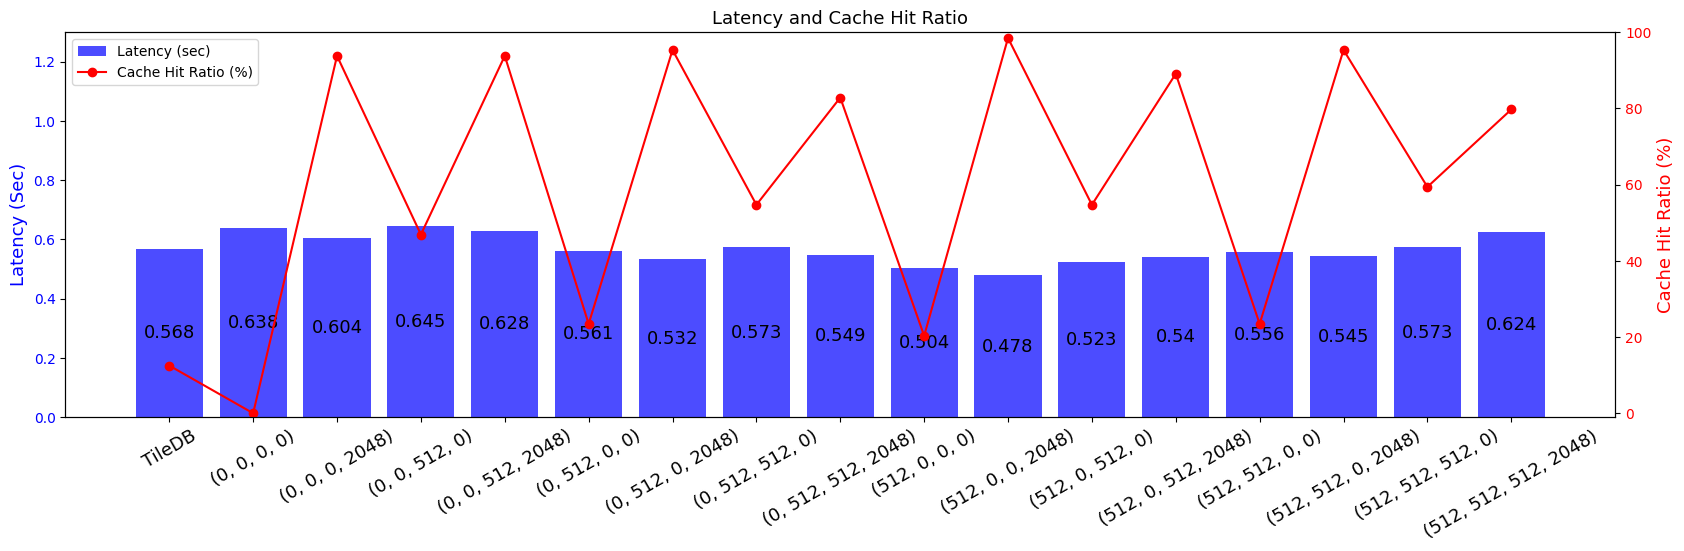

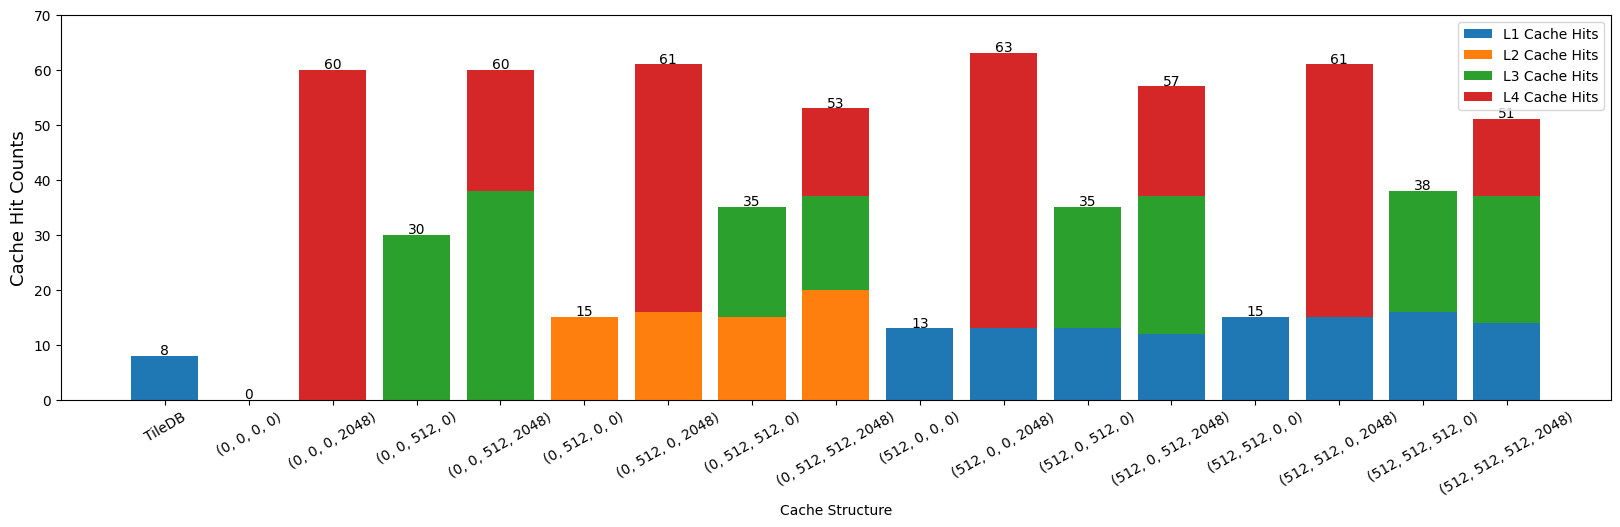

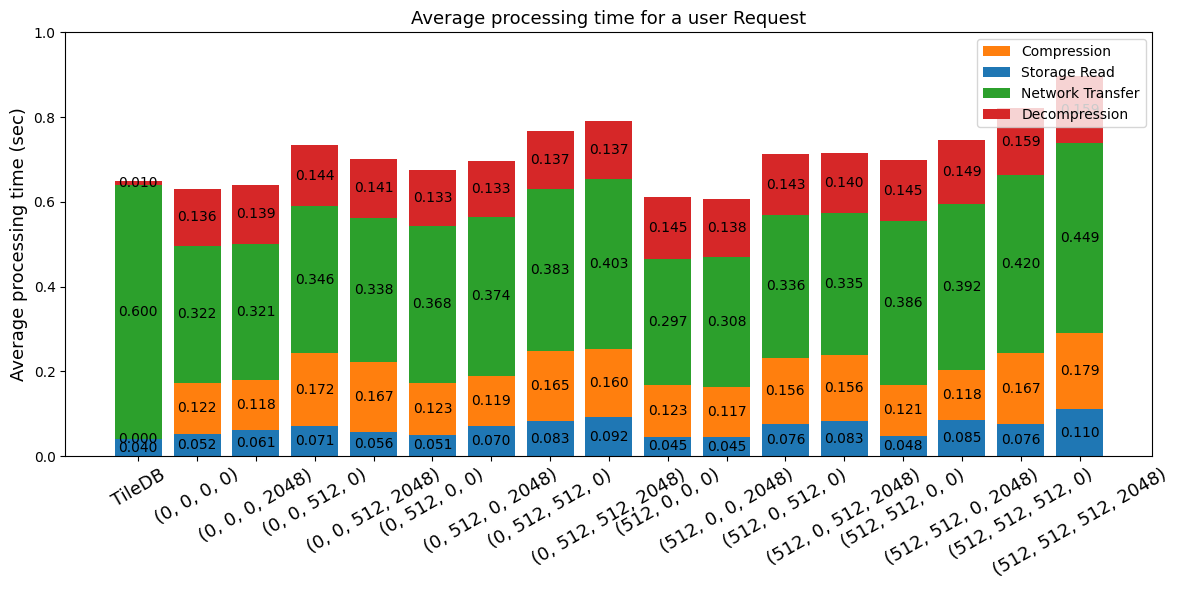

In [12]:
# 固定する変数
tol = 0.00001
Tclatency = 0
UserAnal = 0.5 # ユーザの処理時間
nReqs = 64
accessPattern = f"./request_maker/request_files/64Reqs/numReqs=64_recycleRatio=25.0_maxdistance=5.0.pkl"


df_arch = df[(df["tol"] == tol) & (df["anlTime"] == UserAnal) & (df["nReqs"] == nReqs) & (df["reqPatrn"] == accessPattern)]
df_arch = df_arch.drop(["nReqs","reqPatrn","blkSize"],axis=1)

# ここで、欲しいキャッシュ構成を持ってきてください
L1Sizes = [0,512]
L2Sizes = [0,512]
L3Sizes = [0,512]
L4Sizes = [0,2048]


hanrei = ["TileDB"]
latency = [[0.568]]
AllMissTime = [[56]]
HitUchiwake = []
UserReqLatUchiwake = []

# for TileDB
TileDBHitUchiwake = [[8,0,0,0]]
TileDBUserreq = [[0.04,0,0.60,0.01]]
                 
for L1size in L1Sizes:
    for L2size in L2Sizes:
        for L3size in L3Sizes:
            for L4size in L4Sizes:
                one_row = df_arch[(df_arch["L1Size"] == L1size) & (df_arch["L2Size"] == L2size) & (df_arch["L3Size"] == L3size) & (df_arch["L4Size"] == L4size)]
                hanrei.append(f"({L1size}, {L2size}, {L3size}, {L4size})")
                latency.append(one_row["AvrLat"].values)
                AllMissTime.append(one_row["nAllMis"].values) # nL1Hits,nL2Hits,nL3Hits,nL4Hits,nAllMis
                HitUchiwake.append([one_row["nL1Hits"].values,one_row["nL2Hits"].values,one_row["nL3Hits"].values,one_row["nL4Hits"].values])
                UserReqLatUchiwake.append([one_row["storageAvg"].values,one_row["compAvg"].values,one_row["networkAvg"].values,one_row["decompAvg"].values]) 

# 縦軸、平均レイテンシーの内訳の積み上げグラフ、横軸キャッシュ構成のグラフ ()
print(UserReqLatUchiwake)                
latency = [arr[0] for arr in latency]
AllMissTime = [arr[0] for arr in AllMissTime]
HitTimes = [nReqs - misstime for misstime in AllMissTime]
HitUchiwake = TileDBHitUchiwake + [[item[0] for item in sublist] for sublist in HitUchiwake]
UserReqLatUchiwake = TileDBUserreq + [[item[0] for item in sublist] for sublist in UserReqLatUchiwake]

print(HitUchiwake)
print(UserReqLatUchiwake)
print(UserReqLatUchiwake)
# rotation angle


##### latency and cache hit ratio to multiple archtectures #####
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = hanrei
values = latency
cacheHitRatio = [HitTime/nReqs*100 for HitTime in HitTimes]

# Set the width and height of the figure
fig, ax1 = plt.subplots(figsize=figure_size)  # Adjust the values in figsize=(width, height)

# Create the first bar chart for latency
bars = ax1.bar(categories, latency, color='b', alpha=0.7, label='Latency (sec)')

# Label the first y-axis
# ax1.set_xlabel("Cache Structure")
ax1.set_ylabel("Latency (Seconds)", color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis (twin) for cache hit ratio
ax2 = ax1.twinx()
ax2.plot(categories, cacheHitRatio, color='r', marker='o', label='Cache Hit Ratio (%)')

# Label the second y-axis
ax2.set_ylabel("Cache Hit Ratio (%)", color='r', fontsize=fontSize)
ax2.tick_params(axis='y', labelcolor='r')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper left")

# Add a title
# plt.title(f"Latency and Cache Hit Ratio for Tolerance={tol}, User analysis time={UserAnal}", fontsize=13)
plt.title(f"Latency and Cache Hit Ratio", fontsize=fontSize)

# Set x-axis tick labels rotation and font size
ax1.set_xticklabels(categories, rotation=rotangle, fontsize=fontSize)

# Increase font size for x-axis labels
# ax1.set_xlabel("Cache Structure", fontsize=fontSize)
ax1.set_ylabel("Latency (Sec)", color='b', fontsize=fontSize)

# Annotate the bars with their values within the bars
for bar, value in zip(bars, latency):
    ax1.text(bar.get_x() + bar.get_width() / 2, value / 2,
             str(round(value, 3)), ha='center', va='center', fontsize=fontSize)

ax1.set_ylim(0,latency_y_max)
ax2.set_ylim(-1,100)


# Save the figure
file_name = f"wandering_tol={tol}_analTIme={UserAnal}_latency_{Tclatency}ms.png"
fig.savefig(file_name, bbox_inches='tight',format="png",dpi=300)



#############　キャッシュヒットの内訳 ################
# キャッシュヒットの内訳テスト
import matplotlib.pyplot as plt
import numpy as np

# Sample data
hanrei = hanrei
uchiwake = HitUchiwake

# Extract L1, L2, L3, L4 cache hit values separately
l1_hits = [item[0] for item in uchiwake]
l2_hits = [item[1] for item in uchiwake]
l3_hits = [item[2] for item in uchiwake]
l4_hits = [item[3] for item in uchiwake]

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=figure_size)

# Calculate the bottom positions for each category to stack the bars
bottom_l1 = np.zeros(len(hanrei))
bottom_l2 = np.add(bottom_l1, l1_hits)
bottom_l3 = np.add(bottom_l2, l2_hits)
bottom_l4 = np.add(bottom_l3, l3_hits)

# Define custom colors for each category
colors = ['tab:blue', 'tab:orange', 'tab:green','tab:red' ]


for i in range(len(hanrei)):
    ax.bar(hanrei[i], l1_hits[i], bottom=bottom_l1[i])
    ax.bar(hanrei[i], l2_hits[i], bottom=bottom_l2[i])
    ax.bar(hanrei[i], l3_hits[i], bottom=bottom_l3[i])
    ax.bar(hanrei[i], l4_hits[i], bottom=bottom_l4[i])
    
    total = l1_hits[i] + l2_hits[i] + l3_hits[i] + l4_hits[i]
    
    # Add count label on top of each bar
    ax.annotate(f"{total}", (hanrei[i], total + 1), ha='center', va='center', fontsize=10)

# Plot the stacked bars
ax.bar(hanrei, l1_hits, label='L1 Cache Hits', bottom=bottom_l1,color = colors[0])
ax.bar(hanrei, l2_hits, label='L2 Cache Hits', bottom=bottom_l2,color = colors[1])
ax.bar(hanrei, l3_hits, label='L3 Cache Hits', bottom=bottom_l3,color = colors[2])
ax.bar(hanrei, l4_hits, label='L4 Cache Hits', bottom=bottom_l4,color = colors[3])

# Label the axes and add a title
plt.xlabel("Cache Structure")
plt.ylabel("Cache Hit Counts",fontsize=fontSize)

# Rotate x-axis labels for better readability
plt.xticks(rotation=rotangle,fontsize=10)

# Add a legend
ax.legend()
ax.set_ylim(0,HitCountsmax)


file_name = f"wandering_tol={tol}_analTIme={UserAnal}_cachehitDetail_latency={Tclatency}ms.png"

# Show the chart
fig.savefig(file_name, bbox_inches='tight',format="png",dpi=300)


################ ユーザのリクエストに対する各プロセスの平均処理時間の内訳 ################



# Sample data
categories = hanrei
data = UserReqLatUchiwake

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=detail_fig_size)

# Extract StorageRead, Compression, NetworkLatency, and Decompression values separately
storage_read = [item[0] for item in data]
compression = [item[1] for item in data]
network_latency = [item[2] for item in data]
decompression = [item[3] for item in data]

# Calculate the bottom positions for each category to stack the bars
bottom_storage_read = np.zeros(len(categories))
bottom_compression = np.add(bottom_storage_read, storage_read)
bottom_network_latency = np.add(bottom_compression, compression)
bottom_decompression = np.add(bottom_network_latency, network_latency)

# Plot the stacked bars and add annotations for each segment
for i in range(len(categories)):
    ax.bar(categories[i], storage_read[i], bottom=bottom_storage_read[i], label='Storage Read', color='tab:blue')
    ax.annotate(f'{storage_read[i]:.3f}', (categories[i], bottom_storage_read[i] + storage_read[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

    ax.bar(categories[i], compression[i], bottom=bottom_compression[i], label='Compression', color='tab:orange')
    ax.annotate(f'{compression[i]:.3f}', (categories[i], bottom_compression[i] + compression[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

    ax.bar(categories[i], network_latency[i], bottom=bottom_network_latency[i], label='Network Transfer', color='tab:green')
    ax.annotate(f'{network_latency[i]:.3f}', (categories[i], bottom_network_latency[i] + network_latency[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

    ax.bar(categories[i], decompression[i], bottom=bottom_decompression[i], label='Decompression', color='tab:red')
    ax.annotate(f'{decompression[i]:.3f}', (categories[i], bottom_decompression[i] + decompression[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

# Label the axes and add a titl3
# plt.xlabel("Cache Structure",fontsize=13)
plt.ylabel("Average processing time (sec)",fontsize=13)
plt.title(f"Average processing time for a user Request",fontsize=13)

# Rotate x-axis labels for better readability
plt.xticks(rotation=rotangle,fontsize=13)

# Add a legend with only four labels
handles, labels = ax.get_legend_handles_labels()
unique_labels = list(set(labels))[:4]  # Keep only the first four unique labels
ax.legend([handles[labels.index(label)] for label in unique_labels], unique_labels, loc="upper right")
ax.set_ylim(0,UserReqmax)

file_name = f"wandering_tol={tol}_analTIme={UserAnal}_eachProc_latency_{Tclatency}ms.png"

fig.tight_layout()
# Show the chart
fig.savefig(file_name,bbox_inches='tight',format="png",dpi=300)



